In [1]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import TraceSimulator


import matplotlib.pyplot as plt

def plot_trace_set(trace_set, offset=50):
    """
    Plot a single trace set (shape: 54 x N) with vertical offsets.

    Parameters:
    - trace_set: ndarray, shape (54, N)
    - offset: float, vertical offset between channels
    """
    n_channels, n_samples = trace_set.shape

    for i in range(n_channels):
        color = 'r' if i > 44 else 'b'
        plt.plot(np.arange(n_samples), trace_set[i] + i * offset, color=color, lw=0.2)

    plt.xlabel("Sample Index")
    plt.yticks([])
    plt.ylim(-10, offset * n_channels)
    plt.title("Trace Set")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('../archive/config.yaml')

ts = TraceSimulator(config)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

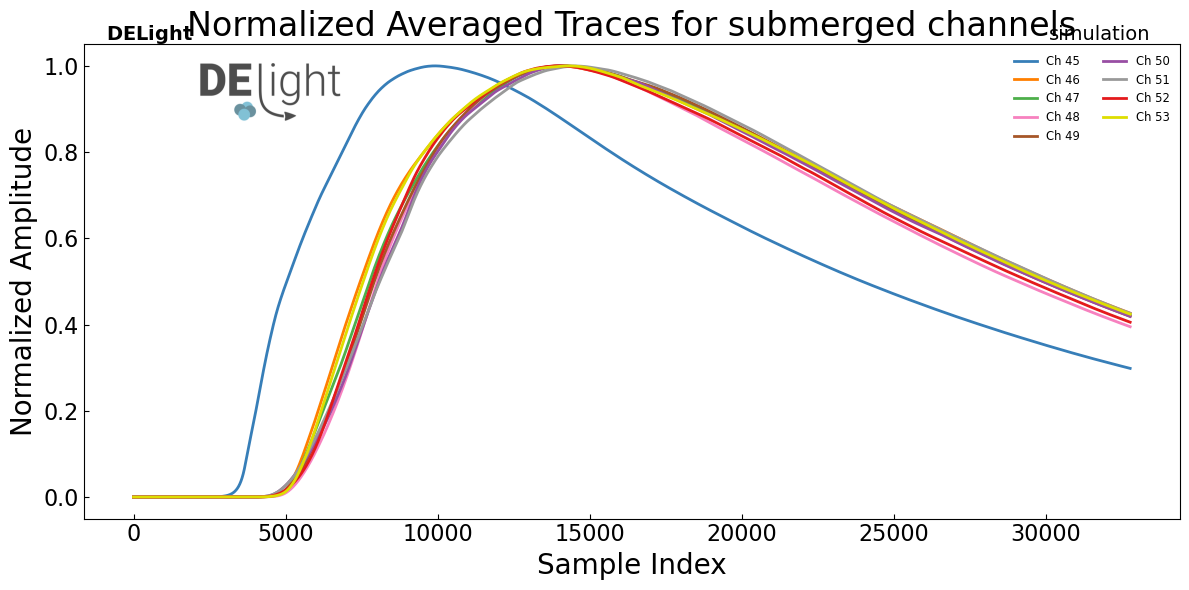

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import DELightStyle

num_sets = 100
start_channel = 45

# Generate the first trace to determine shapes
trace, (x, y, z) = ts.generate(E=30000, no_noise=True, type_recoil='NR', quantize=False, phonon_only=True)
num_channels, num_samples = trace[0].shape

# Preallocate array to hold traces for selected channels
trace_accumulator = np.zeros((num_channels - start_channel, num_samples))

# Accumulate traces
for _ in range(num_sets):
    trace, (x, y, z) = ts.generate(E=30000, no_noise=True, type_recoil='NR', quantize=False, phonon_only=True)
    trace_accumulator += trace[0][start_channel:]

# Average over all sets
avg_traces = trace_accumulator / num_sets

# Normalize each channel to its maximum
normalized_traces = avg_traces / np.max(np.abs(avg_traces), axis=1, keepdims=True)

# Plot the normalized average traces
fig, ax = plt.subplots(figsize=(12, 6))  # Get both fig and ax objects
for i, ch in enumerate(normalized_traces):
    ax.plot(ch, label=f'Ch {start_channel + i}')

ax.set_title("Normalized Averaged Traces for submerged channels")
ax.set_xlabel("Sample Index")
ax.set_ylabel("Normalized Amplitude")
ax.legend(loc='upper right', fontsize='small', ncol=2)

# Apply DELightStyle elements with correct ax reference
DELightStyle.display_text(ax, r'$\mathbf{DELight}$', x0=0.02, y0=1.045)
DELightStyle.display_delight_logo(ax, x0=0.02, y0=0.98)
DELightStyle.display_text(ax, "simulation", x0=0.88, y0=1.04)

plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

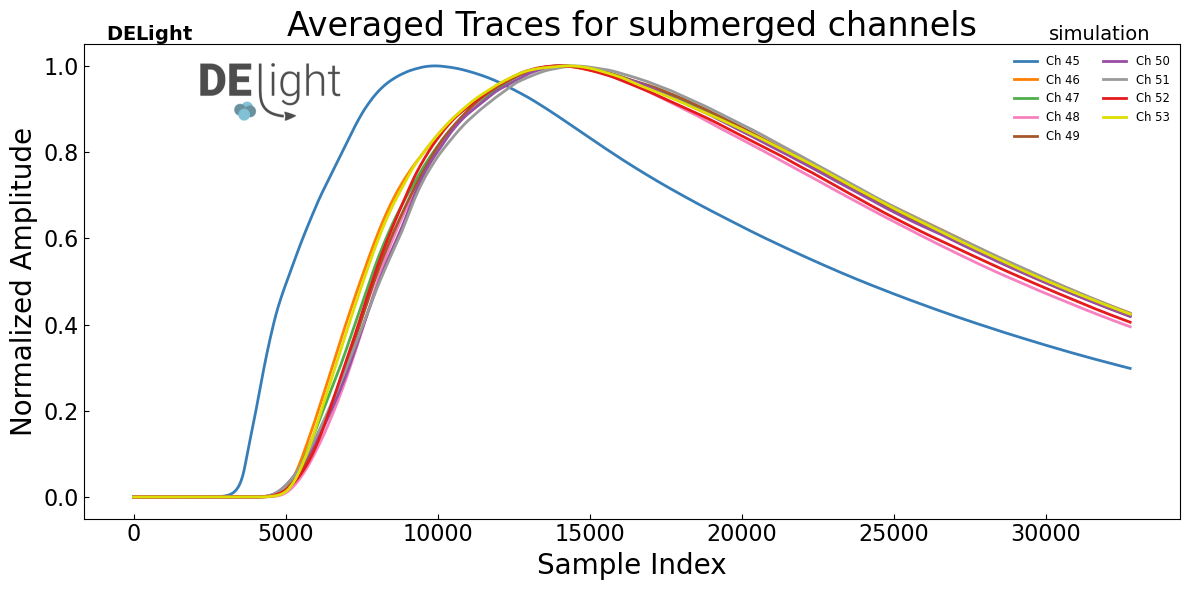

In [5]:
# Plot the normalized average traces
fig, ax = plt.subplots(figsize=(12, 6))  # Get both fig and ax objects
for i, ch in enumerate(normalized_traces):
    ax.plot(ch, label=f'Ch {start_channel + i}')

ax.set_title("Averaged Traces for submerged channels")
ax.set_xlabel("Sample Index")
ax.set_ylabel("Normalized Amplitude")
ax.legend(loc='upper right', fontsize='small', ncol=2)

# Apply DELightStyle elements with correct ax reference
DELightStyle.display_text(ax, r'$\mathbf{DELight}$', x0=0.02, y0=1.045)
DELightStyle.display_delight_logo(ax, x0=0.02, y0=0.98)
DELightStyle.display_text(ax, "simulation", x0=0.88, y0=1.04)

plt.tight_layout()
plt.show()

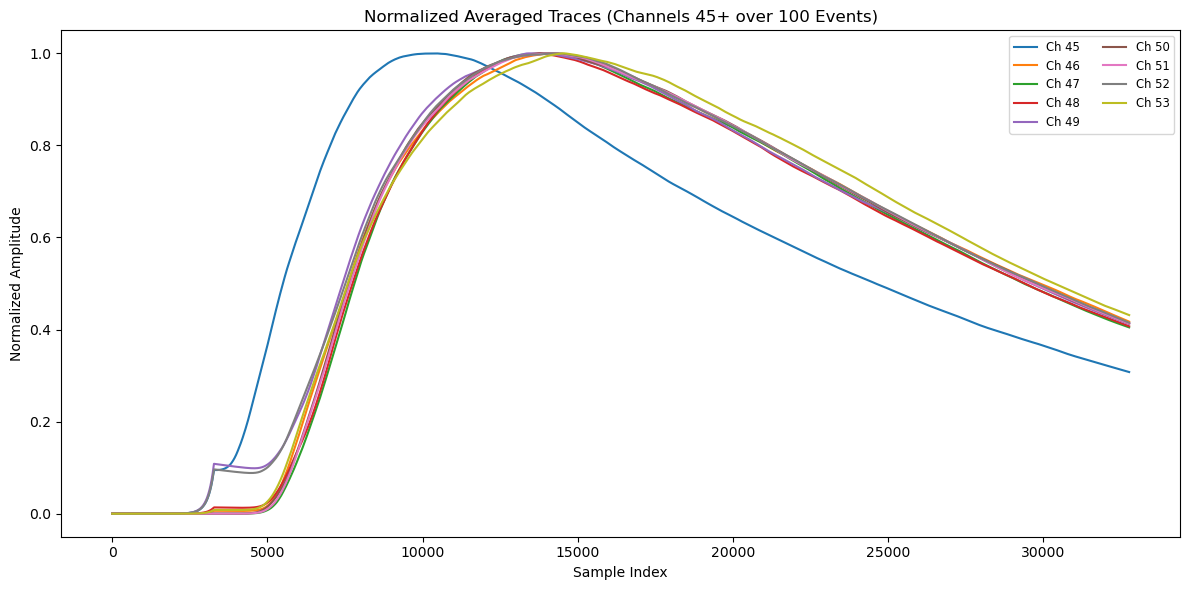

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_sets = 100
start_channel = 45
Energy = 150

# Generate the first trace to determine shapes
trace, (x, y, z)=ts.generate(E=Energy, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
num_channels, num_samples = trace[0].shape

# Preallocate array to hold traces for selected channels
trace_accumulator = np.zeros((num_channels - start_channel, num_samples))

# Accumulate traces
for _ in range(num_sets):
    trace, (x, y, z)=ts.generate(E=Energy, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
    trace_accumulator += trace[0][start_channel:]

# Average over all sets
avg_traces = trace_accumulator / num_sets

# Normalize each channel to its maximum
normalized_traces = avg_traces / np.max(np.abs(avg_traces), axis=1, keepdims=True)

# Plot the normalized average traces
plt.figure(figsize=(12, 6))
for i, ch in enumerate(normalized_traces):
    plt.plot(ch, label=f'Ch {start_channel + i}')

plt.title("Normalized Averaged Traces (Channels 45+ over 100 Events)")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Amplitude")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
normalized_traces.shape
np.save("vac_ch45_mid_eng.npy", normalized_traces[0])
np.save("vac_ch46plus1_mid_eng.npy", normalized_traces[4])
np.save("vac_ch46plus0_mid_eng.npy", normalized_traces[3])

(9, 32768)

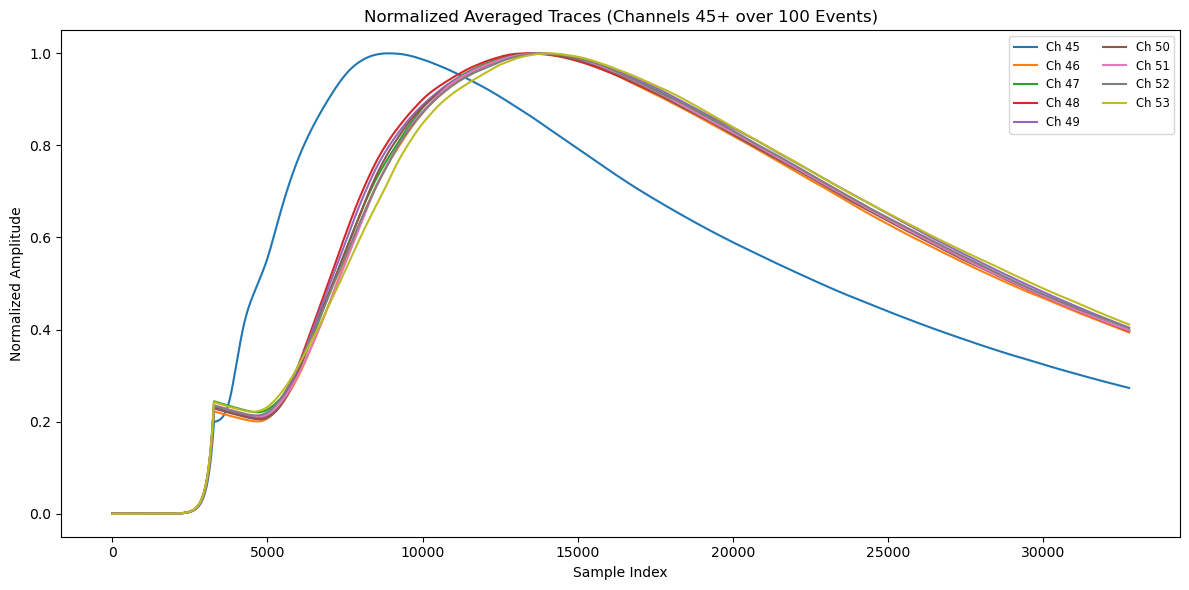

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
num_sets = 100
start_channel = 45
template_dir = "./"
os.makedirs(template_dir, exist_ok=True)

# Generate first trace to get dimensions
trace, (x, y, z) = ts.generate(E=30000, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
num_channels, num_samples = trace[0].shape

# Preallocate for accumulation
trace_accumulator = np.zeros((num_channels - start_channel, num_samples))

# Accumulate traces over multiple sets
for _ in range(num_sets):
    trace, (x, y, z) = ts.generate(E=30000, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
    trace_accumulator += trace[0][start_channel:]

# Average the accumulated traces
avg_traces = trace_accumulator / num_sets

# Save channel 45 (i.e., index 0 after slicing) before normalization
template_ch45 = avg_traces[0]
np.save(os.path.join(template_dir, "vac_ch45_high_eng.npy"), template_ch45)

# Normalize traces (all from channel 45 onwards)
normalized_traces = avg_traces / np.max(np.abs(avg_traces), axis=1, keepdims=True)

# Save average of normalized channels 46+ (i.e., index 1 onwards)
template_46plus = np.mean(normalized_traces[1:], axis=0)
np.save(os.path.join(template_dir, "vac_ch46plus_high_eng.npy"), template_46plus)

# Plotting
plt.figure(figsize=(12, 6))
for i, ch in enumerate(normalized_traces):
    plt.plot(ch, label=f'Ch {start_channel + i}')

plt.title("Normalized Averaged Traces (Channels 45+ over 100 Events)")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Amplitude")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


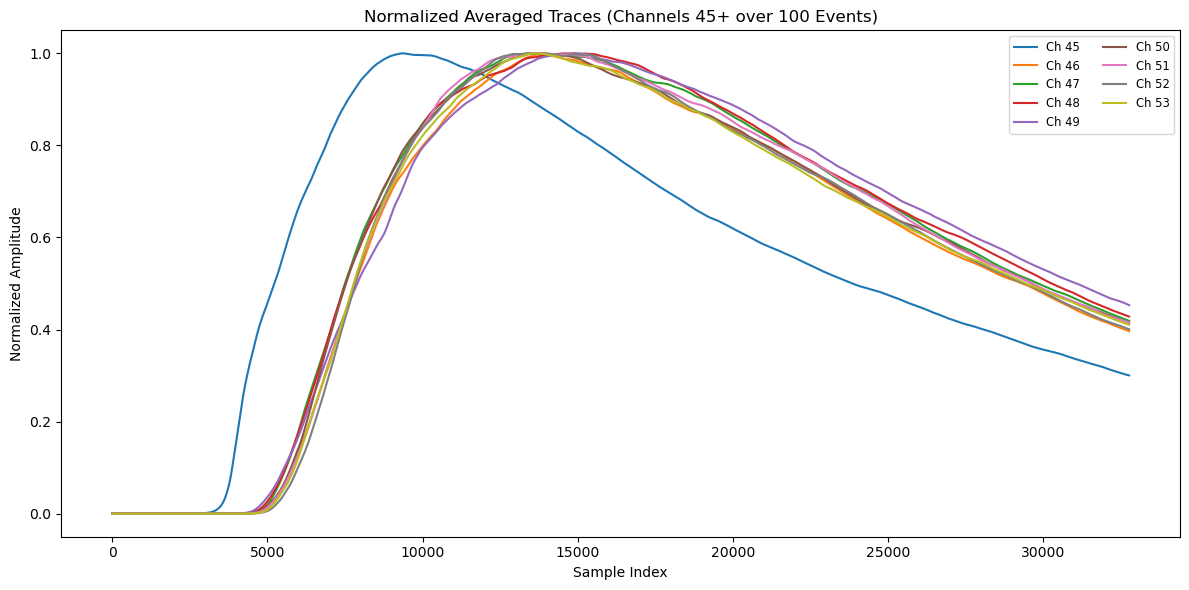

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
num_sets = 100
start_channel = 45
template_dir = "./"
os.makedirs(template_dir, exist_ok=True)

# Generate first trace to get dimensions
trace, (x, y, z) = ts.generate(E=30, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
num_channels, num_samples = trace[0].shape

# Preallocate for accumulation
trace_accumulator = np.zeros((num_channels - start_channel, num_samples))

# Accumulate traces over multiple sets
for _ in range(num_sets):
    trace, (x, y, z) = ts.generate(E=30, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
    trace_accumulator += trace[0][start_channel:]

# Average the accumulated traces
avg_traces = trace_accumulator / num_sets

# Save channel 45 (i.e., index 0 after slicing) before normalization
template_ch45 = avg_traces[0]
np.save(os.path.join(template_dir, "vac_ch45_low_eng.npy"), template_ch45)

# Normalize traces (all from channel 45 onwards)
normalized_traces = avg_traces / np.max(np.abs(avg_traces), axis=1, keepdims=True)

# Save average of normalized channels 46+ (i.e., index 1 onwards)
template_46plus = np.mean(normalized_traces[1:], axis=0)
np.save(os.path.join(template_dir, "vac_ch46plus_low_eng.npy"), template_46plus)

# Plotting
plt.figure(figsize=(12, 6))
for i, ch in enumerate(normalized_traces):
    plt.plot(ch, label=f'Ch {start_channel + i}')

plt.title("Normalized Averaged Traces (Channels 45+ over 100 Events)")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Amplitude")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


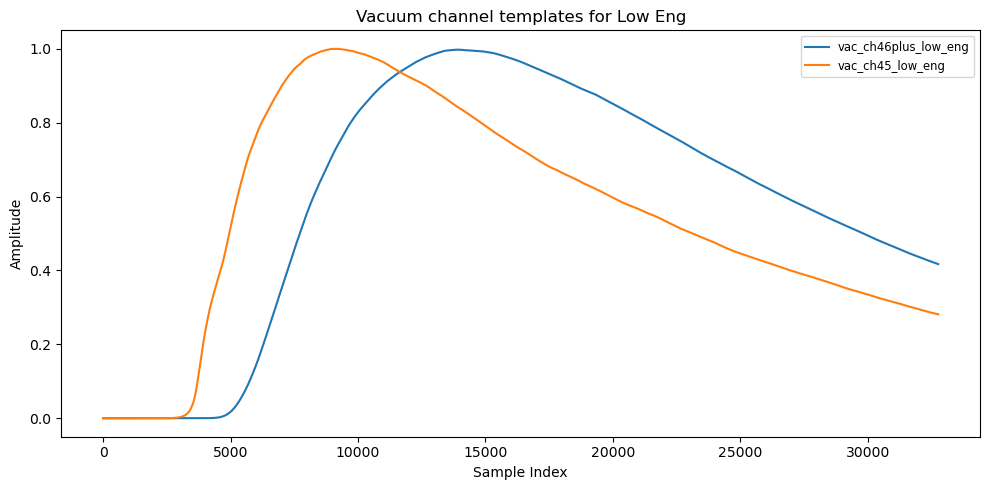

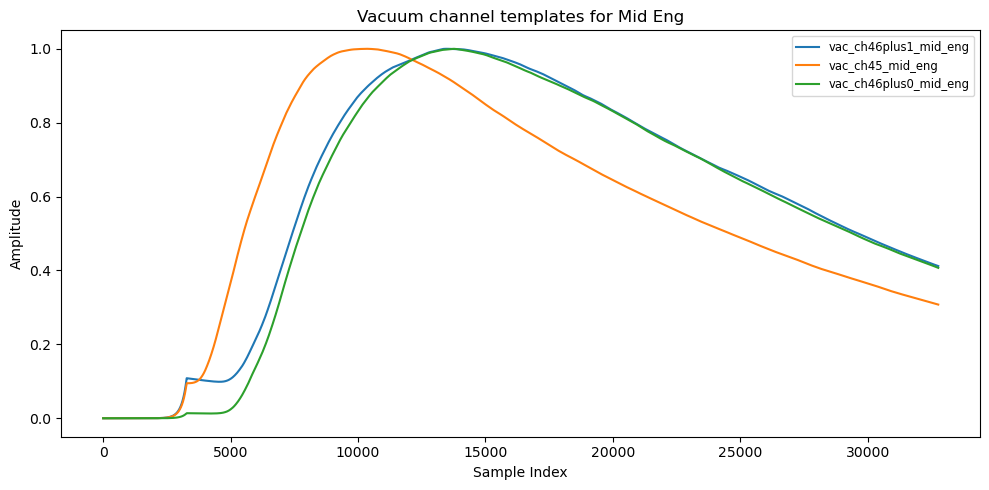

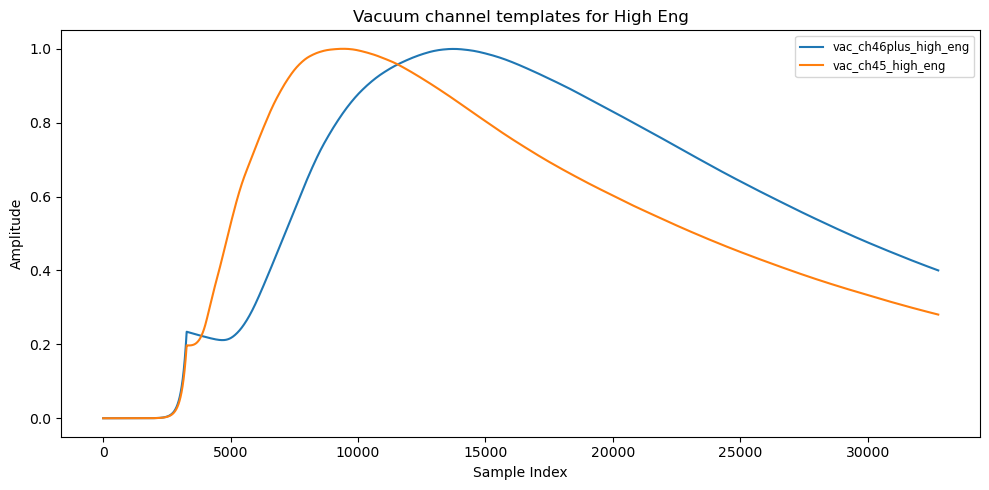

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# Directory containing template files
template_dir = "vac_templates"

# Energy categories
energy_groups = ["low_eng", "mid_eng", "high_eng"]

# Collect and group templates
templates_by_energy = {eng: [] for eng in energy_groups}

# Find .npy files and group by energy tag
for filepath in glob(os.path.join(template_dir, "*.npy")):
    filename = os.path.basename(filepath)
    for eng in energy_groups:
        if eng in filename:
            templates_by_energy[eng].append((filename, np.load(filepath)))
            break

# Plot each energy group
for eng in energy_groups:
    plt.figure(figsize=(10, 5))
    for name, trace in templates_by_energy[eng]:
        plt.plot(trace, label=name.replace(".npy", ""))
    plt.title(f"Vacuum channel templates for {eng.replace('_', ' ').title()}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend(fontsize='small')
    plt.tight_layout()
    plt.show()


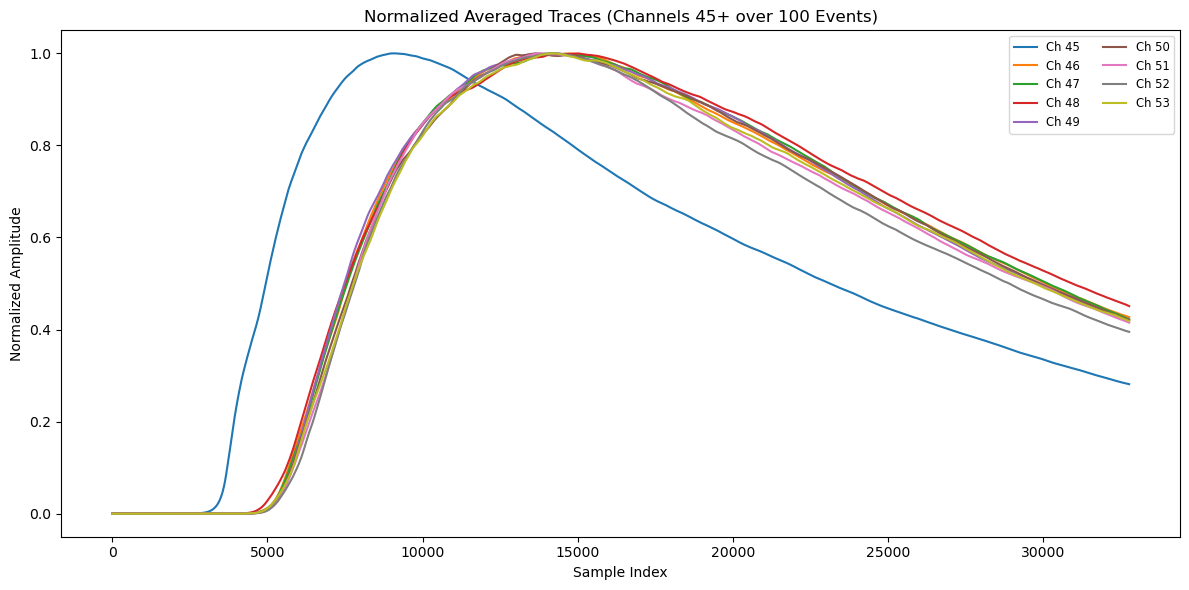

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
num_sets = 100
start_channel = 45
template_dir = "templates"
os.makedirs(template_dir, exist_ok=True)

# Generate first trace to get dimensions
trace, (x, y, z) = ts.generate(E=30, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
num_channels, num_samples = trace[0].shape

# Preallocate for accumulation
trace_accumulator = np.zeros((num_channels - start_channel, num_samples))

# Accumulate traces over multiple sets
for _ in range(num_sets):
    trace, (x, y, z) = ts.generate(E=30, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
    trace_accumulator += trace[0][start_channel:]

# Average the accumulated traces
avg_traces = trace_accumulator / num_sets

# Normalize all traces (channel 45 onward)
normalized_traces = avg_traces / np.max(np.abs(avg_traces), axis=1, keepdims=True)

# Save normalized channel 45 (index 0)
template_ch45 = normalized_traces[0]
np.save(os.path.join(template_dir, "vac_ch45_low_eng"), template_ch45)

# Save average of normalized channels 46+
template_46plus = np.mean(normalized_traces[1:], axis=0)
np.save(os.path.join(template_dir, "template_ch46plus_avg.npy"), template_46plus)

# Plotting
plt.figure(figsize=(12, 6))
for i, ch in enumerate(normalized_traces):
    plt.plot(ch, label=f'Ch {start_channel + i}')

plt.title("Normalized Averaged Traces (Channels 45+ over 100 Events)")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Amplitude")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


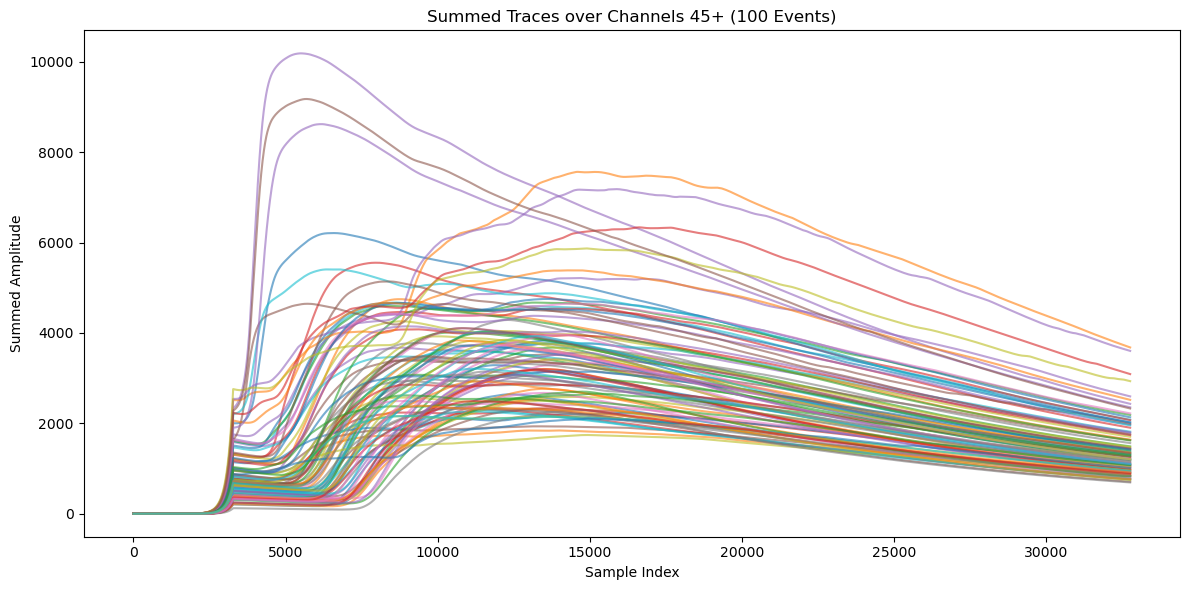

In [5]:
import numpy as np
import matplotlib.pyplot as plt

num_sets = 100
start_channel = 45

# Generate the first trace to determine shapes
trace, (x, y, z) = ts.generate(E=30000, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
num_channels, num_samples = trace[0].shape

# Preallocate array to hold the sum of traces per event
summed_traces = np.zeros((num_sets, num_samples))

# Accumulate summed traces for each event
for i in range(num_sets):
    trace, (x, y, z) = ts.generate(E=30000, no_noise=True, type_recoil='NR', quantize=False, phonon_only=False)
    event_sum = np.sum(trace[0][start_channel:], axis=0)  # Sum across selected channels
    summed_traces[i] = event_sum

# Plot all 100 summed traces
plt.figure(figsize=(12, 6))
for i in range(num_sets):
    plt.plot(summed_traces[i], alpha=0.6, label=f'Event {i}' if i < 10 else "")  # limit labels for clarity

plt.title("Summed Traces over Channels 45+ (100 Events)")
plt.xlabel("Sample Index")
plt.ylabel("Summed Amplitude")
plt.tight_layout()
plt.show()
